In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal as ps
import numpy as np
import geopandas

In [2]:
# Pand id is the building, object id is for example one apartment 
bag = pd.read_csv("../Data/vbo_pand.csv", sep = ";", encoding='latin-1')
print(bag.head())

C:\Users\Gebruiker\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


       object_id         pandid openbareruimte  huisnummer huisletter  \
0  3010000125985  3100000122770    Molenstraat          16        NaN   
1  3010000125986  3100000122770    Molenstraat          20        NaN   
2  3010000125988  3100000118116     Kniestraat           9        NaN   
3  3010000125990  3100000121175     Kniestraat          13        NaN   
4  3010000125991  3100000121174     Kniestraat          15        NaN   

  huisnummertoevoeging postcode  woonplaats    gemeente  provincie  ...  \
0                  NaN   9901KB  Appingedam  Appingedam  Groningen  ...   
1                  NaN   9901KB  Appingedam  Appingedam  Groningen  ...   
2                  NaN   9901AD  Appingedam  Appingedam  Groningen  ...   
3                  NaN   9901AD  Appingedam  Appingedam  Groningen  ...   
4                  NaN   9901AD  Appingedam  Appingedam  Groningen  ...   

        verblijfsobjectstatus object_type  nevenadres       pandstatus  \
0  Verblijfsobject in gebruik       

In [1]:
print(bag.shape)

NameError: name 'bag' is not defined

In [97]:
# identificatie links to pand_id from the BAG dataset
typering = pd.read_csv("../Data/Woningtypering.csv")
typering["begindatum"] =  pd.to_datetime(typering['begindatum'], format='%Y%m%d%H%M%S%f', errors='coerce')

C:\Users\Gebruiker\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Trial with Eindhoven

In [108]:
eindhoven = bag[bag["gemeente"] == "Eindhoven"]
print(eindhoven.shape)


(125562, 23)


In [121]:
typering.columns
# sum(bag["pandid"] == 3100000117486)

Index(['OBJECTID', 'identificatie', 'bouwjaar', 'officieel', 'status',
       'begindatum', 'einddatum', 'documentdatum', 'documentnummer',
       'aanduidinginonderzoek', 'Aantal_VBO', 'woonfunctie',
       'bijeenkomstfunctie', 'celfunctie', 'gezondheidszorgfunctie',
       'industriefunctie', 'kantoorfunctie', 'logiesfunctie',
       'onderwijsfunctie', 'sportfunctie', 'winkelfunctie',
       'overige_gebruiksfunctie', 'Woningtypering', 'shape_Length',
       'shape_Area'],
      dtype='object')

In [126]:
samen = eindhoven.set_index("pandid").join(typering.set_index("identificatie"))


In [131]:
print(sum(samen["industriefunctie"].isna()))
print(samen.shape)
samen.iloc[2]

8800
(125562, 46)


object_id                                 772010001062064
openbareruimte                                 Aalsterweg
huisnummer                                            287
huisletter                                            NaN
huisnummertoevoeging                                  NaN
postcode                                           5644RE
woonplaats                                      Eindhoven
gemeente                                        Eindhoven
provincie                                   Noord-Brabant
nummeraanduiding                          772200001062101
verblijfsobjectgebruiksdoel            bijeenkomstfunctie
oppervlakteverblijfsobject                            489
verblijfsobjectstatus          Verblijfsobject in gebruik
object_type                                           VBO
nevenadres                                              f
pandstatus                                Pand in gebruik
pandbouwjaar                                         1925
x             

In [62]:
kruising = pd.read_csv("../Data/20210903_pand_grid_kruising.csv", delimiter = ";")

C:\Users\Gebruiker\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
print(kruising[kruising["pand_id"] == 3100000117485])
kruising.head()
        

               id  lb_gridcod        pand_id      opp
10991302  6044864         NaN  3100000117485   63,046
10991322  6044865         NaN  3100000117485  249,806


id  lb_gridcod           pand_id  opp
0  21261   1704736.0  1714100000729177  215
1  21261   1704736.0  1714100000729178   45
2  21261   1704736.0  1714100000734055   29
3  21261   1704736.0  1714100000734339  113
4  21261   1704736.0  1714100000735921  267

In [236]:
apotheken[apotheken["id_grid"] == 1704736.0]

id_grid                                           the_geom  duration
43999  1704736  MULTIPOLYGON (((13699.999999999294 371446.6740...       3.5

In [67]:
CBS = geopandas.read_file("../Data/cbs2020/CBS_vk100_2020_v1.shp")
CBS.head(5)

c28992r100  INWONER    MAN  VROUW  INW_014  INW_1524  INW_2544  INW_4564  \
0  E2054N6114        5 -99997 -99997   -99997    -99997    -99997    -99997   
1  E2062N6110        5 -99997 -99997   -99997    -99997    -99997    -99997   
2  E2069N6109        5 -99997 -99997   -99997    -99997    -99997    -99997   
3  E2063N6108       15      5     10   -99997    -99997    -99997    -99997   
4  E2065N6108       10 -99997 -99997   -99997    -99997    -99997    -99997   

   INW_65PL  P_NL_ACHTG  ...  WON_0514  WON_1524  WON_MRGEZ  P_KOOPWON  \
0    -99997      -99997  ...    -99997    -99997     -99997     -99997   
1         5      -99997  ...    -99997    -99997     -99997     -99997   
2         5      -99997  ...    -99997    -99997     -99997     -99997   
3         5          90  ...    -99997    -99997     -99997     -99997   
4         5      -99997  ...    -99997    -99997     -99997     -99997   

   P_HUURWON  WON_HCORP  WON_NBEW  WOZWONING  UITKMINAOW  \
0     -99997     -99997    -99997     -99997      -99997   
1     -99997     -99997    -99997     -99997      -99997   
2     -99997     -99997    -99997     -99997      -99997   
3     -99997     -99997    -99997        379      -99997   
4     -99997     -99997    -99997     -99997      -99997   

                                            geometry  
0  POLYGON ((205400.000 611500.000, 205500.000 61...  
1  POLYGON ((206200.000 611100.000, 206300.000 61...  
2  POLYGON ((206900.000 611000.000, 207000.000 61...  
3  POLYGON ((206300.000 610900.000, 206400.000 61...  
4  POLYGON ((206500.000 610900.000, 206600.000 61...  

[5 rows x 35 columns]

In [71]:
cbs = CBS[CBS["WOZWONING"] != -99997]


In [133]:
cbs.columns

Index(['c28992r100', 'INWONER', 'MAN', 'VROUW', 'INW_014', 'INW_1524',
       'INW_2544', 'INW_4564', 'INW_65PL', 'P_NL_ACHTG', 'P_WE_MIG_A',
       'P_NW_MIG_A', 'AANTAL_HH', 'TOTHH_EENP', 'TOTHH_MPZK', 'HH_EENOUD',
       'HH_TWEEOUD', 'GEM_HH_GR', 'WONING', 'WONVOOR45', 'WON_4564',
       'WON_6574', 'WON_7584', 'WON_8594', 'WON_9504', 'WON_0514', 'WON_1524',
       'WON_MRGEZ', 'P_KOOPWON', 'P_HUURWON', 'WON_HCORP', 'WON_NBEW',
       'WOZWONING', 'UITKMINAOW', 'geometry'],
      dtype='object')

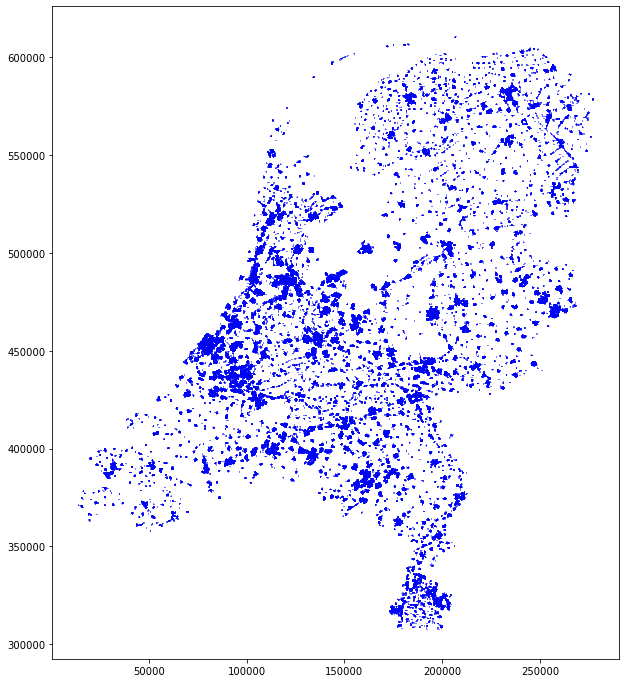

In [81]:
ax = cbs.plot(figsize=(12, 12), alpha=0.5, facecolor = 'g', edgecolor='b')

In [135]:
grid = geopandas.read_file("../Data/NLvierkant/NL_vierkant100m.shp")

In [136]:
grid.head()

C28992R100                                           geometry
0  E2266N6194  POLYGON ((226600.000 619400.000, 226600.000 61...
1  E2267N6194  POLYGON ((226700.000 619500.000, 226800.000 61...
2  E2268N6194  POLYGON ((226800.000 619500.000, 226900.000 61...
3  E2269N6194  POLYGON ((226900.000 619500.000, 227000.000 61...
4  E2270N6194  POLYGON ((227000.000 619500.000, 227100.000 61...

In [137]:
apotheken = pd.read_csv("../Data/grid_apotheken.csv")

In [139]:
apotheken.head()

id_grid                                           the_geom  duration
0     1788  MULTIPOLYGON (((192399.99999999968 306953.4733...      15.0
1     1789  MULTIPOLYGON (((192399.99999999968 306923.1948...      15.1
2     1791  MULTIPOLYGON (((192700.00000000084 306985.9986...      13.9
3     1792  MULTIPOLYGON (((192700.00000000084 306969.8917...      13.9
4     4434  MULTIPOLYGON (((192667.67250848885 307000.0000...      13.8

In [152]:
print(apotheken["the_geom"].iloc[1])

MULTIPOLYGON (((192399.99999999968 306923.19485682476, 192399.99999999968 306953.4733707057, 192410.5404999999 306948.4565000014, 192423.94600000314 306942.07599999936, 192424.98000000074 306938.73800000024, 192426.676000003 306939.2630000005, 192431.60299999765 306923.34049999993, 192436.52999999913 306907.4179999994, 192427.38800000373 306904.5889999977, 192426.236000003 306908.3109999971, 192421.93000000523 306907.247999999, 192402.74400000117 306921.1994999981, 192399.99999999968 306923.19485682476)))


In [216]:
import shapely.wkt

P = shapely.wkt.loads(apotheken["the_geom"].iloc[100003])
print(len(P.geoms))
polygon = list(P)[0]
print(polygon)

1
POLYGON ((50600.00000000213 391600.0000000016, 50499.9999999972 391600.0000000016, 50499.9999999972 391699.9999999997, 50600.00000000213 391699.9999999997, 50600.00000000213 391600.0000000016))


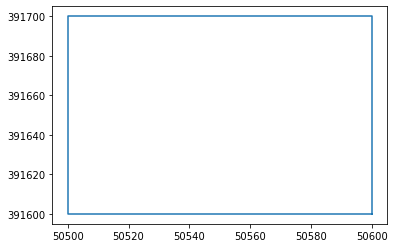

In [217]:
import matplotlib.pyplot as plt

x,y = polygon.exterior.xy
plt.plot(x,y)

In [184]:
lb = pd.read_csv("../Data/leefbaarometer_grid.csv", delimiter = ";")

In [195]:
lb[lb["jaar"] == 2018]

grid_code  jaar  grid_score  score_woningen  score_bewoners  \
1728045    1000757  2018         NaN             NaN             NaN   
1728046    1000758  2018         NaN             NaN             NaN   
1728047    1000814  2018         NaN             NaN             NaN   
1728048    1000817  2018         NaN             NaN             NaN   
1728049    1000831  2018         NaN             NaN             NaN   
...            ...   ...         ...             ...             ...   
2304055     998194  2018         NaN             NaN             NaN   
2304056     998212  2018         NaN             NaN             NaN   
2304057     998229  2018         NaN             NaN             NaN   
2304058     998233  2018         9.0             6.0             6.0   
2304059     998234  2018         9.0             6.0             6.0   

         score_voorzieningen  score_veiligheid  score_fysieke_omgeving  \
1728045                  NaN               NaN                     NaN   
1728046                  NaN               NaN                     NaN   
1728047                  NaN               NaN                     NaN   
1728048                  NaN               NaN                     NaN   
1728049                  NaN               NaN                     NaN   
...                      ...               ...                     ...   
2304055                  NaN               NaN                     NaN   
2304056                  NaN               NaN                     NaN   
2304057                  NaN               NaN                     NaN   
2304058                  3.0               7.0                     9.0   
2304059                  3.0               7.0                     8.0   

         leefbaarometer_ontwikkeling_2012  leefbaarometer_ontwikkeling_2014  \
1728045                               NaN                               NaN   
1728046                               NaN                               NaN   
1728047                               NaN                               NaN   
1728048                               NaN                               NaN   
1728049                               NaN                               NaN   
...                                   ...                               ...   
2304055                               NaN                               NaN   
2304056                               NaN                               NaN   
2304057                               NaN                               NaN   
2304058                               4.0                               5.0   
2304059                               4.0                               5.0   

         ...  ontwikkeling_bewoners_2014  ontwikkeling_veiligheid_2014  \
1728045  ...                         NaN                           NaN   
1728046  ...                         NaN                           NaN   
1728047  ...                         NaN                           NaN   
1728048  ...                         NaN                           NaN   
1728049  ...                         NaN                           NaN   
...      ...                         ...                           ...   
2304055  ...                         NaN                           NaN   
2304056  ...                         NaN                           NaN   
2304057  ...                         NaN                           NaN   
2304058  ...                         4.0                           4.0   
2304059  ...                         4.0                           4.0   

         ontwikkeling_voorzieningen_2014  ontwikkeling_fysieke_omgeving_2014  \
1728045                              NaN                                 NaN   
1728046                              NaN                                 NaN   
1728047                              NaN                                 NaN   
1728048                              NaN                                 NaN   
1728049          

<AxesSubplot:>

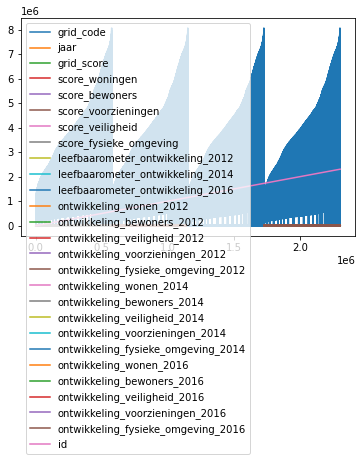

In [192]:
lb.plot()

In [189]:
grid = geopandas.read_file("../Data/barometer2018/woongebied_grids.shp")

In [247]:
for i in grid.geometry:
    if type(i) != shapely.geometry.polygon.Polygon:
        print(i)

MULTIPOLYGON (((177947.4082088381 309200.0000000005, 177899.9999999991 309200.0000000005, 177899.9999999991 309253.5652171838, 177901.373044031 309251.1137230145, 177901.8437040094 309250.4180215108, 177915.1223808316 309233.9652274057, 177928.4010576538 309217.5124333005, 177947.4082088381 309200.0000000005)), ((177999.9999999972 309273.296999996, 177999.9999999972 309272.9762432275, 177999.9540000035 309272.9829999972, 177999.9999999972 309273.296999996)), ((177999.9999999972 309273.296999996, 177983.2150000022 309275.8684999972, 177966.4300000003 309278.4399999985, 177967.5400000029 309286.1600000004, 177963.2100000043 309286.7800000001, 177965.1144653494 309299.9999999986, 177999.9999999972 309299.9999999986, 177999.9999999972 309273.296999996)))
MULTIPOLYGON (((199904.0334238672 309158.0157257548, 199900.0000000021 309152.2738368265, 199900.0000000021 309187.6747557746, 199905.5324965746 309166.2658375777, 199905.8187052789 309164.5613381582, 199905.8071421008 309162.8330152825, 1

MULTIPOLYGON (((197307.0107554561 343600.0000000026, 197300.0000000031 343600.0000000026, 197300.0000000031 343619.0300513654, 197307.0107554561 343600.0000000026)), ((197311.8772499973 343643.642999995, 197300.0000000031 343628.9110211596, 197300.0000000031 343670.3237702281, 197308.8340000033 343680.5330000006, 197321.4689999994 343692.0109999964, 197337.4159999994 343696.7179999945, 197346.8830000037 343686.2410000003, 197355.5900000055 343672.9709999988, 197354.4909999993 343671.8379999993, 197360.6620000025 343665.0820000004, 197354.6040000028 343659.5689999993, 197311.8772499973 343643.642999995)))
MULTIPOLYGON (((194675.9220000028 347870.6829999963, 194699.9999999974 347874.2316704154, 194699.9999999974 347852.1126471456, 194686.0822499991 347848.6102499957, 194664.1460000042 347843.0899999945, 194657.2350000037 347849.1689999967, 194666.5784999999 347859.9259999965, 194675.9220000028 347870.6829999963)), ((194675.9220000028 347870.6829999963, 194661.4982016673 347899.9999999969

MULTIPOLYGON (((190914.9740000023 366476.3589999956, 190910.5930000035 366468.1579999996, 190900.0000000006 366473.9692429347, 190900.0000000006 366484.9999083318, 190915.3090000036 366476.9859999961, 190914.9740000023 366476.3589999956)), ((190902.2084589248 366500.0000000023, 190900.0000000006 366495.6789937896, 190900.0000000006 366500.0000000023, 190902.2084589248 366500.0000000023)))
MULTIPOLYGON (((57973.85500000015 364913.7079999985, 57967.62600000273 364911.6469999972, 57965.33499999885 364918.8699999953, 57966.75900000035 364919.3659999951, 57964.93900000498 364924.4199999949, 57977.1319999999 364928.2159999982, 57994.37533332916 364940.9376666655, 57999.9999999996 364953.8931704251, 57999.9999999996 364932.4161884384, 57991.4392499967 364926.2904999987, 57973.85500000015 364913.7079999985)), ((57999.9999999996 365000.0000000031, 57999.9999999996 364999.2147842394, 57999.30976894734 365000.0000000031, 57999.9999999996 365000.0000000031)))
MULTIPOLYGON (((201599.9999999974 3662

MULTIPOLYGON (((211007.6175732719 375499.999999997, 210999.9999999983 375499.999999997, 210999.9999999983 375515.1336564528, 211007.1468515213 375500.6884714165, 211007.6175732719 375499.999999997)), ((211006.1283447734 375589.8837757553, 210999.9999999983 375575.6114945937, 210999.9999999983 375600.0000000019, 211014.7743824063 375600.0000000019, 211013.376163338 375598.2989237714, 211013.1328271654 375597.9772494913, 211010.6711616117 375594.4345539593, 211009.9729026368 375593.5459754711, 211009.160817166 375592.7600654906, 211006.1283447734 375589.8837757553)))
MULTIPOLYGON (((142503.3056293282 374399.9999999971, 142500.0000000022 374399.9999999971, 142500.0000000022 374404.0126656801, 142503.3056293282 374399.9999999971)), ((142570.8600000011 374491.3329999972, 142558.9560000001 374489.7559999953, 142528.9201166176 374490.1188835235, 142508.0079709244 374457.1657239615, 142502.9759992987 374431.8370554814, 142500.0000000022 374416.8572214765, 142500.0000000022 374500.0000000021, 1

MULTIPOLYGON (((174999.999999999 381199.9999999991, 174995.8630000113 381199.9999999991, 174995.8630000113 381212.0660324324, 174995.8977120517 381212.8985202084, 174996.4084863223 381219.0127393449, 174996.685744501 381220.6585733983, 174997.2328764902 381222.2353702804, 174998.0346411525 381223.6992060777, 174999.0687041969 381225.0093035658, 174999.999999999 381225.8520331545, 174999.999999999 381199.9999999991)), ((174912.6380000022 381290.0959999982, 174921.6390000044 381278.4989999952, 174921.5799999995 381274.1999999983, 174921.5100000049 381269.199999997, 174904.675 381269.4349999992, 174900.0000000009 381269.5002583907, 174900.0000000009 381281.1571822352, 174903.2300000029 381281.1119999959, 174903.3570000012 381290.2249999976, 174912.6380000022 381290.0959999982)))
MULTIPOLYGON (((167208.5907786635 382092.2632438589, 167200.0000000022 382079.2288482024, 167200.0000000022 382100.0000000026, 167233.0708184467 382100.0000000026, 167208.5907786635 382092.2632438589)), ((167300.0

MULTIPOLYGON (((56808.73473711866 389299.999999997, 56800.00000000168 389299.999999997, 56800.00000000168 389339.350575835, 56802.10627112792 389328.2817889016, 56808.06865325597 389302.6793155102, 56808.73473711866 389299.999999997)), ((56800.42855107116 389384.5713171915, 56800.00000000168 389382.0677967361, 56800.00000000168 389400.000000002, 56803.06962337111 389400.000000002, 56800.42855107116 389384.5713171915)))
MULTIPOLYGON (((31506.03678510583 387099.9999999974, 31499.99999999928 387099.9999999974, 31499.99999999928 387101.5829202641, 31506.03678510583 387099.9999999974)), ((31599.9999999974 387099.9999999974, 31512.80677944916 387099.9999999974, 31531.23399999584 387101.5874999972, 31554.75699999934 387103.6139999997, 31578.27999999603 387105.6405000022, 31599.9999999974 387107.5116720439, 31599.9999999974 387099.9999999974)))
MULTIPOLYGON (((31199.99999999809 387499.9999999967, 31194.09622323614 387499.9999999967, 31199.99999999809 387515.0718655328, 31199.99999999809 387499

MULTIPOLYGON (((118537.3400000007 390000.442999996, 118500.0000000027 390004.4809096033, 118500.0000000027 390011.6688395097, 118537.3400000007 390000.442999996)), ((118537.3400000007 390000.442999996, 118543.6099999991 390014.289999995, 118547.9000000008 390020.1200000001, 118554.9500000001 390014.9299999999, 118570.5603333345 390002.9636666655, 118574.4264987943 389999.9999999976, 118537.9902214866 389999.9999999976, 118537.3400000007 390000.442999996)))
MULTIPOLYGON (((196159.6400000006 390709.3249999983, 196159.684 390708.325999998, 196165.3510000054 390708.3789999993, 196169.479946252 390699.999999998, 196145.6246279035 390699.999999998, 196145.589000001 390708.6479999949, 196154.6399999993 390709.280999999, 196159.6400000006 390709.3249999983)), ((196200.0000000033 390800.000000003, 196200.0000000033 390791.9850524925, 196186.6280516931 390792.5352331999, 196185.0669130048 390791.937904938, 196183.4280881946 390791.6089546144, 196181.7573653032 390791.557572946, 196180.1014235736

MULTIPOLYGON (((172224.4750000031 394613.2070000008, 172227.6480000014 394609.8199999959, 172224.9939999997 394607.3329999963, 172220.2190000015 394609.936999995, 172216.6389999993 394607.6259999995, 172214.7429999989 394614.8249999968, 172223.0920000025 394621.5739999948, 172227.6590000046 394616.6989999975, 172224.4750000031 394613.2070000008)), ((172201.7138715855 394686.4524405018, 172199.999999997 394683.7402142055, 172199.999999997 394699.999999998, 172210.2876905899 394699.999999998, 172201.7138715855 394686.4524405018)))
MULTIPOLYGON (((96805.11100000446 396883.9679999973, 96800.00000000087 396883.1698420141, 96800.00000000087 396899.9999999976, 96832.37075391237 396899.9999999976, 96833.03000000556 396895.9699999961, 96819.0705000016 396889.9690000002, 96805.11100000446 396883.9679999973)), ((96899.99999999901 396899.9999999976, 96899.99999999901 396893.3985555375, 96898.92307474208 396893.6758552521, 96897.34996004513 396894.3876287682, 96895.92273577585 396895.3594015078, 96

MULTIPOLYGON (((188799.9999999991 400799.9999999994, 188799.8003437934 400799.9999999994, 188799.9999999991 400800.1031625281, 188799.9999999991 400799.9999999994)), ((188766.8564825368 400799.9999999994, 188743.3561212209 400799.9999999994, 188744.6519999998 400805.2990000006, 188766.8564825368 400799.9999999994)))
MULTIPOLYGON (((111399.9999999996 399500.0000000033, 111392.7398656076 399500.0000000033, 111399.9999999996 399526.1507837252, 111399.9999999996 399500.0000000033)), ((111399.9999999996 399576.5070320506, 111399.9999999996 399554.3222821255, 111396.6659621816 399559.8135494794, 111395.9572872417 399561.2708234886, 111395.4933104012 399562.8234320133, 111395.2862175701 399564.4305973046, 111395.3414478264 399566.0501087538, 111395.6575506029 399567.6394314945, 111396.2262237747 399569.1568235158, 111397.0325316983 399570.5624320165, 111398.0552974925 399571.8193400698, 111399.9999999996 399576.5070320506)))
MULTIPOLYGON (((80264.94459798548 400805.1899067857, 80271.448159108

MULTIPOLYGON (((138706.6956478533 402339.2367185055, 138699.9999999985 402327.0480019851, 138699.9999999985 402360.6951878666, 138704.6153045422 402352.5599811987, 138705.8078465379 402351.4306310091, 138706.7994418519 402350.1213078992, 138707.5633413091 402348.6673320078, 138708.0789380668 402347.1079256273, 138708.3323234288 402345.485155122, 138708.3166621133 402343.8427961469, 138708.0323765885 402342.2251527981, 138707.487135717 402340.6758624229, 138706.6956478533 402339.2367185055)), ((138799.9999999967 402387.8556711281, 138799.9999999967 402314.5211099153, 138799.7435265343 402315.2268008468, 138799.4426221802 402316.8479844744, 138797.3569067094 402337.4320364352, 138794.26939605 402360.4208792897, 138793.8909844634 402361.8675336485, 138793.7325202549 402363.3544409207, 138793.7975466954 402364.8483538099, 138794.0846097827 402366.3158683504, 138799.6889997713 402386.7239987919, 138799.9999999967 402387.8556711281)))
MULTIPOLYGON (((107983.0220754613 401999.9999999973, 1079

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



MULTIPOLYGON (((180500.715045091 443600.0000000006, 180499.999999998 443600.0000000006, 180499.999999998 443602.5746959905, 180500.715045091 443600.0000000006)), ((180515.725722278 443635.7144634088, 180499.999999998 443615.5366353083, 180499.999999998 443699.9999999987, 180565.5284176556 443699.9999999987, 180557.0249004389 443683.8599943374, 180552.2017024242 443662.3640599514, 180551.7403220485 443660.8677402012, 180551.051017791 443659.4617870493, 180550.1506903104 443658.1806722697, 180549.0614142402 443657.0558068203, 180547.8098969403 443656.1147706423, 180527.4725000105 443643.1835000136, 180515.725722278 443635.7144634088)))
MULTIPOLYGON (((121922.9540000042 442257.010000001, 121911.1700000007 442255.4470000007, 121900.0000000002 442289.2234101581, 121900.0000000002 442299.9999999977, 121920.3179974506 442299.9999999977, 121919.6830000012 442281.6770000004, 121922.9540000042 442257.010000001)), ((121999.9999999983 442299.9999999977, 121999.9999999983 442275.7498274577, 121992.

MULTIPOLYGON (((87295.52555171831 446599.9999999988, 87256.1140029809 446599.9999999988, 87264.86099315793 446613.002720862, 87265.93356515953 446614.3350682946, 87267.21750117766 446615.4651429295, 87268.67523889092 446616.3598837412, 87270.26413130478 446616.993114558, 87271.93769441007 446617.3463098244, 87280.79062800447 446619.5559261106, 87282.33043069526 446619.9559371622, 87282.92078895302 446620.0419625556, 87291.95438355018 446621.0752349727, 87292.54747170027 446621.1328746595, 87294.18991272483 446621.1951639557, 87295.82007243074 446620.9852310674, 87297.39314272231 446620.5088464057, 87298.86588471479 446619.779104327, 87300.00000000192 446618.9590930762, 87300.00000000192 446603.494438966, 87299.86207746269 446603.3675389225, 87298.72316539113 446602.5182571901, 87295.52555171831 446599.9999999988)), ((87230.65254217837 446697.7534778871, 87228.95736386336 446697.2981401142, 87227.58863228702 446697.1529819495, 87226.21293369183 446697.1971453321, 87224.85633064961 44669

MULTIPOLYGON (((81346.61963715081 453599.999999997, 81299.99999999863 453599.999999997, 81299.99999999863 453611.1952181443, 81308.46602537006 453615.5889526693, 81312.68727145458 453618.0146005345, 81313.07105745695 453618.2251169431, 81314.30687870091 453618.8682195185, 81314.92731024741 453619.1644399998, 81317.20374967158 453620.1567129, 81317.52091059156 453620.3084485156, 81323.40379584604 453623.3816987867, 81324.91732022236 453624.0201520526, 81326.51494701696 453624.4022086438, 81328.15356620593 453624.5175592297, 81329.78896164516 453624.3630912135, 81331.37700416771 453623.9429727249, 81332.87484238471 453623.2685401506, 81334.24205893624 453622.3579922388, 81335.44176115337 453621.2358990218, 81336.44157652944 453619.93253881, 81336.63018175596 453619.6396653571, 81336.88295551628 453619.2253994652, 81337.49307778664 453617.9750825082, 81339.38800000711 453613.9440000035, 81340.33050972171 453612.0920249553, 81341.94623850624 453609.1675878047, 81345.13660979224 453603.1465

MULTIPOLYGON (((149325.6362282288 451799.9999999966, 149299.9999999973 451796.5936723108, 149299.9999999973 451799.9999999966, 149325.6362282288 451799.9999999966)), ((149400.0000000022 451799.9999999966, 149400.0000000022 451787.8058092078, 149382.2100000032 451791.9655000041, 149362.0130000052 451796.6879999996, 149356.5447293493 451799.9999999966, 149400.0000000022 451799.9999999966)))
MULTIPOLYGON (((80462.4030653915 453315.15544169, 80482.93079630466 453310.7535179447, 80500 453329.7548022462, 80500 453300.0000000026, 80400.00000000189 453300.0000000026, 80400.00000000189 453391.2957757211, 80400.23599307641 453390.8920008574, 80400.85400012933 453389.8309984477, 80401.28800333597 453389.0850030339, 80404.62594252391 453383.3720983819, 80408.17800179363 453377.2919959127, 80408.73301542326 453376.3409735853, 80412.01698293941 453370.7140292147, 80415.16200464976 453365.3240044543, 80417.7490038237 453360.9130009885, 80427.32001783609 453344.6574052386, 80431.21999153832 453337.760

MULTIPOLYGON (((131800.6662112634 455173.7477819824, 131799.9999999985 455169.0487374339, 131799.9999999985 455200.000000001, 131808.5142885801 455200.000000001, 131808.3780460574 455198.0061546685, 131808.2494510092 455196.9523178648, 131807.8874977382 455195.5243966046, 131800.7696611424 455174.1868229759, 131800.6662112634 455173.7477819824)), ((131899.9999999966 455200.000000001, 131899.9999999966 455102.6060320033, 131897.2002373239 455125.997321881, 131893.2022997548 455143.0801907211, 131892.9591992818 455144.726879171, 131892.9926128921 455146.3910799358, 131893.1990214644 455148.3799979531, 131893.4999741362 455151.2000026081, 131893.62 455152.3750000088, 131893.7400440962 455153.5499957533, 131894.0399935946 455156.3700028484, 131894.4000026864 455159.8300258634, 131894.7612066274 455163.3019773191, 131895.0798420314 455166.120016911, 131895.1990015094 455167.2890042411, 131895.3200375533 455168.4699963223, 131895.620001549 455171.2900029265, 131895.9900000073 455174.74500002

MULTIPOLYGON (((107944.6962894652 458699.9999999967, 107899.9999999971 458699.9999999967, 107899.9999999971 458713.3072359007, 107907.2722500003 458711.1065000049, 107928.8190000035 458704.586, 107939.6700000055 458701.4330000002, 107944.6962894652 458699.9999999967)), ((108000.000000002 458800.0000000016, 108000.000000002 458783.3388747308, 107999.4375466116 458783.525832282, 107994.1186207276 458785.7292363525, 107993.5578262109 458785.923394741, 107971.4963743534 458792.1211128733, 107949.4349224957 458798.3188309987, 107943.4506185529 458800.0000000016, 108000.000000002 458800.0000000016)))
MULTIPOLYGON (((221001.3020000042 458654.4179999949, 221000.0000000015 458653.487052845, 221000.0000000015 458656.2395368872, 221001.3020000042 458654.4179999949)), ((221002.7710000022 458663.7479999948, 221000.0000000015 458661.7672443363, 221000.0000000015 458667.6240513562, 221002.7710000022 458663.7479999948)))
MULTIPOLYGON (((101599.9999999994 461300.0000000024, 101598.6353137033 461300.000

MULTIPOLYGON (((132810.0101081562 462118.2961208035, 132800.0000000002 462100.2441694001, 132800.0000000002 462139.0353013882, 132805.0598873305 462136.7849344325, 132806.7137746819 462136.4776264662, 132808.2927493095 462135.8974362529, 132809.7521296816 462135.0607819082, 132811.0506185229 462133.9913389227, 132812.1514714303 462132.7193701956, 132813.0235366737 462131.280869669, 132813.6421367074 462129.7165437571, 132813.9897665092 462128.0706594709, 132814.056588911 462126.3897917363, 132813.8407129861 462124.7215054503, 132813.3482475535 462123.1130094558, 132813.2138541286 462122.7778097905, 132812.4270807886 462121.2233085803, 132811.3824429967 462119.8289563392, 132810.0101081562 462118.2961208035)), ((132848.2102541517 462199.9999999992, 132842.303000001 462195.3309999968, 132838.7090293463 462199.9999999992, 132848.2102541517 462199.9999999992)))
MULTIPOLYGON (((92901.6808423514 462500.0000000003, 92899.99999999907 462498.783010985, 92899.99999999907 462500.0000000003, 92901

MULTIPOLYGON (((168806.5702172168 465700.0000000016, 168799.9999999994 465700.0000000016, 168799.9999999994 465704.2795398784, 168800.0782260199 465703.9689346736, 168806.5702172168 465700.0000000016)), ((168817.6410167607 465799.9999999998, 168799.9999999994 465777.7945933534, 168799.9999999994 465799.9999999998, 168817.6410167607 465799.9999999998)))
MULTIPOLYGON (((212085.024000002 469215.7320000003, 212080.5450000053 469206.9809999992, 212075.9410000047 469209.3369999981, 212053.794000001 469217.7180000006, 212047.8289999995 469220.7130000003, 212013.4501765594 469234.2812716375, 212012.1446136901 469234.6921220151, 212000 469237.7877405268, 212000 469278.0349129744, 212021.492169013 469252.2195970202, 212022.7901611956 469251.1465411395, 212023.8896735508 469249.8708824026, 212066.4740000005 469225.6879999967, 212070.6470000031 469223.5519999945, 212080.0829999988 469218.2609999981, 212085.024000002 469215.7320000003)), ((212002.7051854957 469300.0000000023, 212000 469282.18671898

MULTIPOLYGON (((194599.9999999993 470329.8496234259, 194599.9999999993 470299.9999999971, 194500.0000000012 470299.9999999971, 194500.0000000012 470320.0340071999, 194506.9822733166 470321.0894303223, 194508.476870233 470321.2017521263, 194508.9977408928 470321.1881775986, 194526.5282010786 470320.2738261722, 194527.9278937312 470320.1012397263, 194529.2893878146 470319.7334633303, 194530.5856042176 470319.1778117761, 194531.7907621571 470318.445336554, 194562.6217920738 470312.0418327723, 194589.8757099884 470308.5673678213, 194599.9999999993 470329.8496234259)), ((194599.9999999993 470400.0000000021, 194599.9999999993 470369.6733266485, 194599.2320127172 470371.2760032599, 194594.6552260867 470380.3889152892, 194593.9304958332 470381.4834530202, 194585.3167346577 470396.7096784865, 194583.4553380937 470400.0000000021, 194599.9999999993 470400.0000000021)))
MULTIPOLYGON (((138900.0000000016 470400.0000000021, 138899.8945028601 470400.0000000021, 138898.595236771 470406.1860255841, 138

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



MULTIPOLYGON (((262125.2405673004 527400.0000000027, 262100.0000000005 527390.3406591229, 262100.0000000005 527400.0000000027, 262125.2405673004 527400.0000000027)), ((262199.9999999986 527299.9999999977, 262165.9394329933 527299.9999999977, 262170.8661693229 527309.1474020336, 262174.4341507854 527351.8462244067, 262169.1443465243 527377.508321762, 262126.7169164831 527400.0000000027, 262199.9999999986 527400.0000000027, 262199.9999999986 527299.9999999977)))
MULTIPOLYGON (((208222.7779522919 527737.3815051814, 208200.0000000031 527730.9605362166, 208200.0000000031 527800.000000002, 208236.9795977223 527800.000000002, 208220.2221848728 527787.2291006554, 208230.8712634489 527760.0893228486, 208232.1058855087 527758.8837773519, 208233.114870302 527757.4839269051, 208233.8681727307 527755.9314556452, 208234.343361289 527754.2725923611, 208234.5262860331 527752.5567339396, 208234.4114998967 527750.8349744605, 208234.0024209433 527749.1585837029, 208232.629117629 527744.7329990122, 208232

MULTIPOLYGON (((196719.533626351 536799.9999999967, 196715.7839427887 536799.9999999967, 196715.9420000011 536800.7529999984, 196719.533626351 536799.9999999967)), ((196774.2665078631 536799.9999999967, 196733.7854456231 536799.9999999967, 196742.7929999977 536801.4484999976, 196759.8660000032 536804.1939999949, 196765.4510000001 536826.2952499974, 196771.0360000037 536848.3965, 196776.6210000006 536870.4977500024, 196776.7448495266 536900.0000000016, 196799.9999999989 536900.0000000016, 196799.9999999989 536898.0542835521, 196791.5950000023 536895.8999999987, 196785.131250002 536872.6507499979, 196778.6675000016 536849.4014999971, 196772.2037500012 536826.1522499963, 196774.2665078631 536799.9999999967)))
MULTIPOLYGON (((259500.0000000016 535100.0000000013, 259496.8304536933 535100.0000000013, 259500.0000000016 535110.9624542971, 259500.0000000016 535100.0000000013)), ((259500.0000000016 535199.9999999994, 259500.0000000016 535121.68550622, 259484.4264038117 535133.7335232182, 259466.

MULTIPOLYGON (((111710.4590474089 544600.0000000002, 111700.0000000008 544593.2171035078, 111700.0000000008 544600.0000000002, 111710.4590474089 544600.0000000002)), ((111799.9999999989 544500.0000000021, 111787.2904308056 544500.0000000021, 111785.8995331746 544503.0295092975, 111777.3893987636 544521.56540344, 111776.8099934863 544523.1800528088, 111776.5150794573 544524.869972571, 111776.5133354125 544526.5854316984, 111776.7400060125 544529.2500008789, 111777.1799401303 544534.3293465778, 111777.6099989793 544539.4099885392, 111778.0400110646 544544.4999975031, 111778.4242169042 544549.8994056105, 111774.8726030379 544570.2354087904, 111752.3866247322 544600.0000000002, 111799.9999999989 544600.0000000002, 111799.9999999989 544500.0000000021)))
MULTIPOLYGON (((239900.0000000013 544587.1205662515, 239900.0000000013 544551.7544790646, 239892.1070000005 544554.5900000001, 239892.427000003 544555.4809999965, 239885.1600000055 544558.0919999961, 239887.8820000006 544565.6689999967, 2399

MULTIPOLYGON (((183917.0838440913 553900.000000003, 183900.0000000024 553900.000000003, 183900.0000000024 553944.0461963554, 183900.4937456327 553942.7521624621, 183900.5971039813 553942.4624708754, 183901.355083644 553940.2224959813, 183901.5773885362 553939.674681519, 183908.8614884952 553924.3893596306, 183909.2310421634 553923.5076376487, 183909.4480938054 553922.8705070773, 183910.1936194149 553920.9314191297, 183910.395155533 553920.3391723919, 183911.565359046 553916.5031146682, 183917.0838440913 553900.000000003)), ((183900.9356836367 554000.0000000012, 183900.0000000024 553992.5999087712, 183900.0000000024 554000.0000000012, 183900.9356836367 554000.0000000012)))
MULTIPOLYGON (((209191.3301703641 553900.000000003, 209174.7013758869 553900.000000003, 209173.3160000035 553901.8199999983, 209179.2590000053 553906.3439999983, 209191.0990000016 553908.033999997, 209195.0499999996 553902.8189999987, 209191.3301703641 553900.000000003)), ((209103.9448300473 553947.2433596696, 209102.

MULTIPOLYGON (((186699.9999999976 562700.0000000014, 186685.3106850056 562700.0000000014, 186688.8559999991 562705.2464999999, 186699.9999999976 562721.7378402769, 186699.9999999976 562700.0000000014)), ((186699.9999999976 562773.0494965741, 186699.9999999976 562734.3233941959, 186688.0400000037 562770.0109999952, 186675.339999999 562778.9609999972, 186673.2360000024 562780.4269999969, 186659.1760000008 562790.3100000003, 186652.6210000041 562794.3309999997, 186656.1353513109 562799.9999999995, 186665.2586686451 562799.9999999995, 186672.0980000033 562797.5899999954, 186676.8040000042 562794.6869999967, 186688.6290000017 562783.6565000003, 186699.9999999976 562773.0494965741)))
MULTIPOLYGON (((214699.999999997 563800.0000000012, 214698.213175186 563800.0000000012, 214699.999999997 563800.117326944, 214699.999999997 563800.0000000012)), ((214690.2040000019 563872.1499999956, 214687.6480000049 563869.3929999964, 214686.8400000006 563870.1419999958, 214682.9200000043 563865.9130000002, 21

MULTIPOLYGON (((219229.936085891 570505.3665872306, 219270.6259110615 570501.116089824, 219288.0518094069 570504.5315115709, 219289.5236036731 570504.6937070661, 219291.0032053685 570504.6365707926, 219292.4581086886 570504.3613580021, 219299.8900972703 570502.3763404891, 219299.9999999993 570502.3364391178, 219299.9999999993 570499.9999999981, 219200.0000000012 570499.9999999981, 219200.0000000012 570516.4610825013, 219200.7138337709 570516.4300964721, 219202.3258659819 570516.0893113443, 219203.8600576849 570515.4884468182, 219205.2747589175 570514.6438150769, 219229.936085891 570505.3665872306)), ((219211.9404503961 570576.5381387293, 219210.3319958353 570576.2962953958, 219208.7056116852 570576.31840524, 219207.104325784 570576.6038833171, 219205.5705019812 570577.1451769751, 219204.1447193502 570577.9279656688, 219202.8646985928 570578.9315398473, 219201.7643041141 570580.1293487861, 219200.8726481175 570581.4897030992, 219200.2133203769 570582.9766130432, 219200.0000000012 570583

MULTIPOLYGON (((235100.6850000042 576403.5090000001, 235100.0000000027 576403.4112675183, 235100.0000000027 576408.3098325483, 235100.6850000042 576403.5090000001)), ((235103.1560000009 576411.4199999982, 235100.0000000027 576410.9700374112, 235100.0000000027 576416.874043759, 235102.3299999995 576417.2069999943, 235103.1560000009 576411.4199999982)), ((235200.0000000009 576400.0000000034, 235189.5645062836 576400.0000000034, 235195.1247566429 576410.0922894838, 235200.0000000009 576418.9412376549, 235200.0000000009 576400.0000000034)))
MULTIPOLYGON (((245400.0000000003 576100.0000000022, 245357.7317276619 576100.0000000022, 245362.5786092779 576108.84253705, 245373.2947080864 576128.3927361679, 245374.2327284123 576129.805028188, 245375.395848287 576131.0385609491, 245376.7506343955 576132.0578771498, 245378.2581440731 576132.8336770411, 245379.8750446966 576133.3436606368, 245381.5548592566 576133.5731687176, 245383.2493023028 576133.5156041826, 245384.9096679002 576133.1726216932, 2

MULTIPOLYGON (((231413.9342080794 583100.0000000003, 231399.9999999972 583100.0000000003, 231399.9999999972 583121.4224259567, 231400.092925239 583121.4271536963, 231401.8226940811 583121.2120880694, 231403.4888395091 583120.6999231772, 231405.0407381337 583119.9062203807, 231406.431237786 583118.8550951959, 231407.6180901864 583117.5784845069, 231408.5652345495 583116.1151762579, 231409.2438932904 583114.5096309423, 231413.9342080794 583100.0000000003)), ((231500.0000000021 583130.9229999965, 231494.2199999999 583128.0759999976, 231490.6199999993 583135.1469999992, 231498.5590000006 583139.0480000011, 231500.0000000021 583139.8140000004, 231500.0000000021 583130.9229999965)))
MULTIPOLYGON (((175394.931984184 583400.0000000015, 175370.2645305885 583400.0000000015, 175377.3555297912 583412.8382220212, 175378.3381299765 583414.2712108057, 175379.5539465804 583415.5124803087, 175380.9662725641 583416.5245550564, 175382.5324680556 583417.276879244, 175384.2052476494 583417.7467392641, 1753

MULTIPOLYGON (((184503.9409734625 595000.000000002, 184499.999999998 595000.000000002, 184499.999999998 595011.2551449763, 184503.9409734625 595000.000000002)), ((184509.0837157638 595069.3063959774, 184499.999999998 595054.5389956923, 184499.999999998 595100.0000000001, 184503.4009259432 595100.0000000001, 184511.2873253259 595084.9530512879, 184511.6697564219 595084.135675441, 184512.7798338869 595081.4540812462, 184513.2980506787 595079.8166209459, 184513.5284284441 595078.1146365348, 184513.4641714403 595076.3983335618, 184513.1071751404 595074.7183399557, 184512.4679703021 595073.1242125992, 184511.5654123621 595071.6629754411, 184510.4261251859 595070.3777324322, 184509.0837157638 595069.3063959774)))
MULTIPOLYGON (((256917.9861139042 595400.0000000013, 256900.0000000026 595400.0000000013, 256900.0000000026 595410.2976007739, 256917.9861139042 595400.0000000013)), ((257000.0000000008 595400.0000000013, 256920.4612002196 595400.0000000013, 256943.0199388178 595402.902511677, 25699

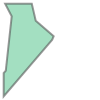

In [207]:
grid.geometry.iloc[14]

In [221]:
sum(grid["geometry"] == polygon)

1

In [230]:
sum(lb.grid_score.isna())/len(lb)

0.4751846740102254

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("../Data/grids_koppeling_gwb.csv", sep = ";")

In [7]:
df

id_grid    id_buurt   id_wijk id_gemeente  \
0         73000  BU19030000  WK190300      GM1903   
1         49287  BU19030502  WK190305      GM1903   
2         67930  BU09810100  WK098101      GM0981   
3         65224  BU09810009  WK098100      GM0981   
4         83776  BU09810006  WK098100      GM0981   
...         ...         ...       ...         ...   
695008    22870  BU19030509  WK190305      GM1903   
695009    30922  BU09810008  WK098100      GM0981   
695010    25571  BU17290509  WK172905      GM1729   
695011    30912  BU09810007  WK098100      GM0981   
695012    25637  BU09810008  WK098100      GM0981   

                                 naam_buurt                 naam_wijk  \
0                            Eijsden-Breust           Wijk 00 Eijsden   
1                                  Noorbeek  Wijk 05 Mheer - Noorbeek   
2                                     Vaals             Wijk 01 Vaals   
3       Verspreide huizen Cottessen-Camerig    Wijk 00 Vijlen-Lemiers   
4                                    Holset    Wijk 00 Vijlen-Lemiers   
...                                     ...                       ...   
695008                    Verspreide huizen  Wijk 05 Mheer - Noorbeek   
695009                             Wolfhaag    Wijk 00 Vijlen-Lemiers   
695010                    Verspreide huizen              Wijk 05 Epen   
695011                                Raren    Wijk 00 Vijlen-Lemiers   
695012                             Wolfhaag    Wijk 00 Vijlen-Lemiers   

            naam_gemeente  
0       Eijsden-Margraten  
1       Eijsden-Margraten  
2                   Vaals  
3                   Vaals  
4                   Vaals  
...                   ...  
695008  Eijsden-Margraten  
695009              Vaals  
695010      Gulpen-Wittem  
695011              Vaals  
695012              Vaals  

[695013 rows x 7 columns]

In [8]:
df = pd.read_csv("../Data/20200725 - groenkaart.csv", sep = ";")

In [9]:
df

id     cbs_100  lb_gridcode  gm_code         gm_naam  \
0          18130         NaN          NaN     1714           Sluis   
1          18131         NaN          NaN     1714           Sluis   
2          21259         NaN          NaN     1714           Sluis   
3          21260         NaN          NaN     1714           Sluis   
4          21261         NaN    1704736.0     1714           Sluis   
...          ...         ...          ...      ...             ...   
3536606  8372630         NaN          NaN     1969  Westerkwartier   
3536607  8372631         NaN          NaN     1969  Westerkwartier   
3536608  8372632         NaN          NaN     1969  Westerkwartier   
3536609  8372633  E2267N5806          NaN     1969  Westerkwartier   
3536610  8372634         NaN          NaN     1969  Westerkwartier   

         stedelijkheid      groen  gem_aangr  corr_groen  score_abs  \
0                    5  20.000000  50.846154   35.423077          3   
1                    5  20.166667  50.790598   35.478632          3   
2                    5  99.000000  88.879867   93.939933          7   
3                    5  74.938462  66.898558   70.918510          4   
4                    5  57.433333  58.887111   58.160222          4   
...                ...        ...        ...         ...        ...   
3536606              5  98.590000  96.375000   97.482500          9   
3536607              5  94.960000  97.493750   96.226875          8   
3536608              5  98.360000  84.750425   91.555212          6   
3536609              5  71.739583  81.311584   76.525584          5   
3536610              5  71.343750  76.656128   73.999939          5   

         score_ntm_sted  score_szs_sted  
0                     2               3  
1                     2               3  
2                     6               7  
3                     4               5  
4                     4               4  
...                 ...             ...  
3536606               8               9  
3536607               7               8  
3536608               6               7  
3536609               5               6  
3536610               4               5  

[3536611 rows x 12 columns]

In [10]:
grid2015

NameError: name 'grid2015' is not defined